# Using DLPy for Pre-trained Models and Perform Transfer Learning

You can use the SAS DLPy API to access a wide variety of pre-trained deep learning models. Access to a collection of pre-trained deep learning models is a good thing: pre-trained deep neural networks represent significant savings in compute and development time.

Transfer learning is a machine learning method that takes advantage of previously trained models. Transfer learning takes a pre-trained model that was developed for one task and reuses it as the starting point for a new model.

This example uses SAS DLPy to import a collection of many different types of common deep learning models. The model collection includes imported Caffe models with weights that were trained on the ImageNet1K dataset, and stored in `.h5` file format.

The example code that follows shows how to create a VGG16 ImageNet model to perform image classification, and continues by creating a VGG16 model configured to perform transfer learning. The sample code then provides examples that show how to define other models that have pre-trained weights similarily, such as VGG19 and ResNet152.

Some of the model types included in the DLPy collection do not include trained weights. The example code shows how to use SAS DLPy to create a DenseNet model and trains it from scratch.   

This example assumes that you have the SAS DLPy API and an active SAS CAS server.

In [1]:
%matplotlib inline

### Configure CAS and Import SWAT

SAS DLPy requires a running SAS CAS server and Scripting Wrapper for Analytic Transfer (SWAT). The SWAT package is a Python interface to CAS. 

<b>Note:</b> For more information about starting a CAS session with the SWAT package, see https://sassoftware.github.io/python-swat/getting-started.html.

In [1]:
import swat
sess = swat.CAS(cashost, casport)

### Import Collection of Models from DLPy 

The DLPy applications module contains a collection of various deep learning models. The example code below imports the following deep learning model types: VGG, LeNet, ResNet, DenseNet, Inception and Yolo.

In [2]:
from dlpy.applications import (VGG11, VGG13, VGG16, VGG19, LeNet5,
                               ResNet18_Caffe, ResNet18_SAS, ResNet34_Caffe, ResNet34_SAS,
                               ResNet50_Caffe, ResNet50_SAS, ResNet101_Caffe, ResNet101_SAS, 
                               ResNet152_Caffe, ResNet152_SAS, ResNet_Wide,
                               DenseNet, DenseNet121, Darknet, Darknet_Reference, InceptionV3)

<h3> Downloadable Prebuilt Models with Weights</h3> 


Five of the model types that you can import using SAS DLPy include pre-trained weight files: VGG16, VGG19, ResNet50, ResNet101, and ResNet152.

You can download the pre-trained `.h5` weight files for the VGG16, VGG19, ResNet50, ResNet101, and ResNet152 models from  
https://support.sas.com/documentation/prod-p/vdmml/zip/. 

Open the zip archive for the desired model type and extract the corresponding `.h5` file. Then use a transfer protocol such as `ftp` or `scp` to upload the `.h5` file to a server side directory that your CAS server can access.

*Note:* The example code uses a hypothetical path `/disk/linux/dlpy/...` to represent the path to the directory on your server where you store the downloaded model and weight files. The path for your operating environment will be different.


<h3>Using the "include_top" Parameter</h3>


When you use SAS DLPy to import a pre-built model that has a `.h5` model weight file, a boolean setting `include_top=` in the code determines whether to include weights for <i>all</i> model layers, or to include weights for all model layers *except* the final prediction layer. 

If you specify `include_top=True` in your model creation code, the model weights for all layers (*including* the final prediction layer) are loaded. Using the final prediction layer weights configures a model to perform prediction tasks.
In this scenario, model assumes a classification task of 1,000 classes as the weights are trained on the ImageNet1K dataset (which has 1,000 classes).
</li>

If you specify `include_top=False` in your model creation code, the ImageNet weights (*without* the final prediction layer) will be loaded. You must specify the number of classes in your model code, according to the classification task. Configuring your model weights without the final layer and specifying your own classes creates a model suitable for performing transfer learning.

The code that follows uses SAS DLPy to import a pre-trained VGG16 model that uses the `VGG_ILSVRC_16_layers.caffemodel.h5` weight file. The first code instance creates a VGG16 image classification model, and uses the `include_top=True` setting to load weights in the `.h5` file for all model layers, *including* the final prediction layer.  

The second code instance also imports a pre-trained VGG16 model that uses the `VGG_ILSVRC_16_layers.caffemodel.h5` weight file, but instead uses the `include_top=False` setting to load weights in the `.h5` file for all model layers *except* the final prediction layer. In this case, the model creation code must specify the classes that the transfer learning model requires. 

### Create VGG16 Model


The following code imports a pre-trained VGG16 ImageNet model along with its pre-trained weights (trained on the ImageNet 1K data set).

The `model1` model_table is named `VGG16`. The model uses 3 channels (BGR) to analyze color images. The input images are 224 x 224 pixels in size. The model uses default BGR offset values of 103.939, 116.779, and 123.68. 


In [5]:
pre_trained='/disk/linux/dlpy/VGG_ILSVRC_16_layers.caffemodel.h5'
model1 = VGG16( sess, 
               model_table='VGG16',
               n_classes=1000, 
               n_channels=3, width=224, height=224, scale=1,
               offsets=(103.939, 116.779, 123.68),
               pre_trained_weights=True, 
               pre_trained_weights_file=pre_trained,
               include_top=True)

NOTE: Model table is attached successfully!
NOTE: Model is named to "vgg16" according to the model name in the table.
NOTE: Cloud Analytic Services made the uploaded file available as table NEW_LABEL_TABLE_37WLRU in caslib CASUSER(ethem_kinginthenorth).
NOTE: The table NEW_LABEL_TABLE_37WLRU has been created in caslib CASUSER(ethem_kinginthenorth) from binary data uploaded to Cloud Analytic Services.
NOTE: Model weights attached successfully!


Use `print_summary()` to display an overview of the `model1` architecture:

In [6]:
model1.print_summary()

,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,data,input,None,None,None,"(224, 224, 3)","(0, 0)"
1,conv1_1,convo,"(3, 3)",1,Rectifier,"(224, 224, 64)","(1728, 64)"
2,conv1_2,convo,"(3, 3)",1,Rectifier,"(224, 224, 64)","(36864, 64)"
3,pool1,pool,"(2, 2)",2,Max,"(112, 112, 64)","(0, 0)"
4,conv2_1,convo,"(3, 3)",1,Rectifier,"(112, 112, 128)","(73728, 128)"
5,conv2_2,convo,"(3, 3)",1,Rectifier,"(112, 112, 128)","(147456, 128)"
6,pool2,pool,"(2, 2)",2,Max,"(56, 56, 128)","(0, 0)"
7,conv3_1,convo,"(3, 3)",1,Rectifier,"(56, 56, 256)","(294912, 256)"
8,conv3_2,convo,"(3, 3)",1,Rectifier,"(56, 56, 256)","(589824, 256)"
9,conv3_3,convo,"(3, 3)",1,Rectifier,"(56, 56, 256)","(589824, 256)"


<h3>Visualize the VGG16 Model</h3>

Use `plot_network()` to display a Directional Acyclic Graph (DAG) of `model1`.

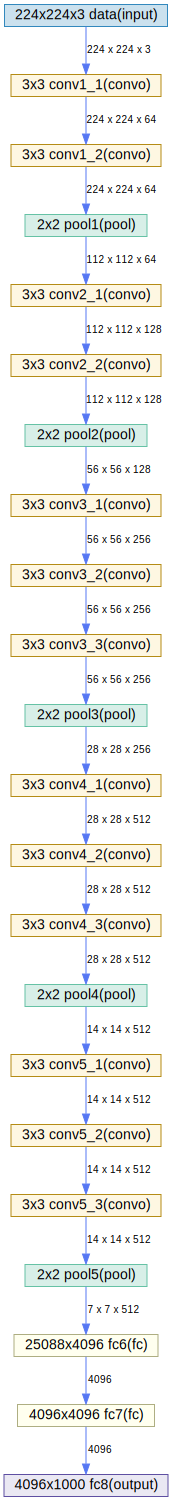

In [7]:
model1.plot_network()

The code above used pre-trained model weights and the `include_top=True` setting. 

Now use the same model and model weights file and the `include_top=False` setting to create a VGG16 transfer learning model named `model2`. Using the `include_top=False` setting allows you to have any number of neurons in the final layer. This is useful because it gives you flexibility to use the model with other (such as non-ImageNet) types of data.



### Create VGG16 Model to Perform Transfer Learning


The following code imports a pre-trained VGG16 ImageNet model along with its pre-trained weights trained on the ImageNet1K dataset.  

The created `model2` can be used to perform transfer learning for a problem that uses ImageNet weights. In particular, `model2` would be suited for a 2-class image classification problem, using input images sized 224 x 224 pixels.   

The `model2` model_table is named `VGG16_notop`. The model uses 3 channels (BGR) to analyze color images. The input images are 224 x 224 pixels in size. The model uses default BGR offset values of 103.939, 116.779, and 123.68. 

The `include_top=False` setting does not load model weights for the final prediction layer. If the transfer learnng task is a 2-class image classification problem, then you must specify in the code that the model uses 2 classes.

In [8]:
model2 = VGG16(sess, model_table='VGG16_notop',
               n_classes=2, 
               n_channels=3, width=224, height=224, scale=1,
               offsets=(103.939, 116.779, 123.68),
               pre_trained_weights=True, 
               pre_trained_weights_file='/disk/linux/dlpy/VGG_ILSVRC_16_layers.caffemodel.h5',
               include_top=False)

NOTE: Model weights attached successfully!
NOTE: Model table is attached successfully!
NOTE: Model is named to "vgg16_notop" according to the model name in the table.


Use `print_summary()` to view a summary of the `model2` table architecture:

In [9]:
model2.print_summary()

,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,data,input,None,None,None,"(224, 224, 3)","(0, 0)"
1,conv1_1,convo,"(3, 3)",1,Rectifier,"(224, 224, 64)","(1728, 64)"
2,conv1_2,convo,"(3, 3)",1,Rectifier,"(224, 224, 64)","(36864, 64)"
3,pool1,pool,"(2, 2)",2,Max,"(112, 112, 64)","(0, 0)"
4,conv2_1,convo,"(3, 3)",1,Rectifier,"(112, 112, 128)","(73728, 128)"
5,conv2_2,convo,"(3, 3)",1,Rectifier,"(112, 112, 128)","(147456, 128)"
6,pool2,pool,"(2, 2)",2,Max,"(56, 56, 128)","(0, 0)"
7,conv3_1,convo,"(3, 3)",1,Rectifier,"(56, 56, 256)","(294912, 256)"
8,conv3_2,convo,"(3, 3)",1,Rectifier,"(56, 56, 256)","(589824, 256)"
9,conv3_3,convo,"(3, 3)",1,Rectifier,"(56, 56, 256)","(589824, 256)"


Note that the last layers of `model1` and `model2` have different output sizes. The output layer for the model `model1` has 1000 classes, because the weighted ImageNet training data contains 1000 classes. The final output layer for `model2` contains 2 classes.

### Create VGG19 Model

The same methods demonstrated creating the VGG16 models with pre-trained weights apply to other model types as well.

After creating `model3`, use `print_summary()` to display an overview of the model architecture.

In [10]:
model3 = VGG19(sess, 
               pre_trained_weights=True, 
               pre_trained_weights_file='/disk/linux/dlpy/VGG_ILSVRC_19_layers.caffemodel.h5',
               include_top=True)
model3.print_summary()

NOTE: Model table is attached successfully!
NOTE: Model is named to "vgg19" according to the model name in the table.
NOTE: Cloud Analytic Services made the uploaded file available as table NEW_LABEL_TABLE_VJDYUS in caslib CASUSER(ethem_kinginthenorth).
NOTE: The table NEW_LABEL_TABLE_VJDYUS has been created in caslib CASUSER(ethem_kinginthenorth) from binary data uploaded to Cloud Analytic Services.
NOTE: Model weights attached successfully!


,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,data,input,None,None,None,"(224, 224, 3)","(0, 0)"
1,conv1_1,convo,"(3, 3)",1,Rectifier,"(224, 224, 64)","(1728, 64)"
2,conv1_2,convo,"(3, 3)",1,Rectifier,"(224, 224, 64)","(36864, 64)"
3,pool1,pool,"(2, 2)",2,Max,"(112, 112, 64)","(0, 0)"
4,conv2_1,convo,"(3, 3)",1,Rectifier,"(112, 112, 128)","(73728, 128)"
5,conv2_2,convo,"(3, 3)",1,Rectifier,"(112, 112, 128)","(147456, 128)"
6,pool2,pool,"(2, 2)",2,Max,"(56, 56, 128)","(0, 0)"
7,conv3_1,convo,"(3, 3)",1,Rectifier,"(56, 56, 256)","(294912, 256)"
8,conv3_2,convo,"(3, 3)",1,Rectifier,"(56, 56, 256)","(589824, 256)"
9,conv3_3,convo,"(3, 3)",1,Rectifier,"(56, 56, 256)","(589824, 256)"


### Create ResNet50 Model

The following code imports a pre-trained ResNet50 ImageNet model. The code uses the `include_top=True` setting to load weights for all model layers. This creates a ResNet50 model named `model4`. 

After creating `model4`, use `print_summary()` to display an overview of the model architecture.



In [11]:
model4 = ResNet50_Caffe( sess, 
                        pre_trained_weights=True, 
                        pre_trained_weights_file='/disk/linux/dlpy/ResNet-50-model.caffemodel.h5',
                        include_top=True)
model4.print_summary()

NOTE: Model table is attached successfully!
NOTE: Model is named to "resnet50_caffe" according to the model name in the table.
NOTE: Cloud Analytic Services made the uploaded file available as table NEW_LABEL_TABLE_JZB7Q4 in caslib CASUSER(ethem_kinginthenorth).
NOTE: The table NEW_LABEL_TABLE_JZB7Q4 has been created in caslib CASUSER(ethem_kinginthenorth) from binary data uploaded to Cloud Analytic Services.
NOTE: Model weights attached successfully!


,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,data,input,None,None,None,"(224, 224, 3)","(0, 0)"
1,conv1,convo,"(7, 7)",2,Identity,"(112, 112, 64)","(9408, 64)"
2,bn_conv1,batchnorm,None,None,Rectifier,"(112, 112, 64)","(0, 128)"
3,pool1,pool,"(3, 3)",2,Max,"(56, 56, 64)","(0, 0)"
4,res2a_branch2a,convo,"(1, 1)",1,Identity,"(56, 56, 64)","(4096, 0)"
5,bn2a_branch2a,batchnorm,None,None,Rectifier,"(56, 56, 64)","(0, 128)"
6,res2a_branch2b,convo,"(3, 3)",1,Identity,"(56, 56, 64)","(36864, 0)"
7,bn2a_branch2b,batchnorm,None,None,Rectifier,"(56, 56, 64)","(0, 128)"
8,res2a_branch2c,convo,"(1, 1)",1,Identity,"(56, 56, 256)","(16384, 0)"
9,bn2a_branch2c,batchnorm,None,None,Identity,"(56, 56, 256)","(0, 512)"


### Create ResNet101 Model

The following code imports a pre-trained ResNet101 ImageNet model. This creates a ResNet101 model named `model5`. 

After creating `model5`, use `print_summary()` to display an overview of the model architecture.

In [12]:
model5 = ResNet101_Caffe(sess, 
                         pre_trained_weights=True, 
                         pre_trained_weights_file='/disk/linux/dlpy/ResNet-101-model.caffemodel.h5',
                         include_top=True)
model5.print_summary()

NOTE: Model table is attached successfully!
NOTE: Model is named to "resnet101_caffe" according to the model name in the table.
NOTE: Cloud Analytic Services made the uploaded file available as table NEW_LABEL_TABLE_UQFIOL in caslib CASUSER(ethem_kinginthenorth).
NOTE: The table NEW_LABEL_TABLE_UQFIOL has been created in caslib CASUSER(ethem_kinginthenorth) from binary data uploaded to Cloud Analytic Services.
NOTE: Model weights attached successfully!


,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,data,input,None,None,None,"(224, 224, 3)","(0, 0)"
1,conv1,convo,"(7, 7)",2,Identity,"(112, 112, 64)","(9408, 64)"
2,bn_conv1,batchnorm,None,None,Rectifier,"(112, 112, 64)","(0, 128)"
3,pool1,pool,"(3, 3)",2,Max,"(56, 56, 64)","(0, 0)"
4,res2a_branch2a,convo,"(1, 1)",1,Identity,"(56, 56, 64)","(4096, 0)"
5,bn2a_branch2a,batchnorm,None,None,Rectifier,"(56, 56, 64)","(0, 128)"
6,res2a_branch2b,convo,"(3, 3)",1,Identity,"(56, 56, 64)","(36864, 0)"
7,bn2a_branch2b,batchnorm,None,None,Rectifier,"(56, 56, 64)","(0, 128)"
8,res2a_branch2c,convo,"(1, 1)",1,Identity,"(56, 56, 256)","(16384, 0)"
9,bn2a_branch2c,batchnorm,None,None,Identity,"(56, 56, 256)","(0, 512)"


### Create ResNet152 Model

The following code imports a pre-trained ResNet101 ImageNet model. This creates a ResNet152 model named `model6`. 

After creating `model6`, use `print_summary()` to display an overview of the model architecture.

In [13]:
model6 = ResNet152_Caffe(sess, 
                         pre_trained_weights=True, 
                         pre_trained_weights_file='/disk/linux/dlpy/ResNet-152-model.caffemodel.h5',
                         include_top=True)
model6.print_summary()

NOTE: Model table is attached successfully!
NOTE: Model is named to "resnet152_caffe" according to the model name in the table.
NOTE: Cloud Analytic Services made the uploaded file available as table NEW_LABEL_TABLE_U5AETF in caslib CASUSER(ethem_kinginthenorth).
NOTE: The table NEW_LABEL_TABLE_U5AETF has been created in caslib CASUSER(ethem_kinginthenorth) from binary data uploaded to Cloud Analytic Services.
NOTE: Model weights attached successfully!


,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,data,input,None,None,None,"(224, 224, 3)","(0, 0)"
1,conv1,convo,"(7, 7)",2,Identity,"(112, 112, 64)","(9408, 64)"
2,bn_conv1,batchnorm,None,None,Rectifier,"(112, 112, 64)","(0, 128)"
3,pool1,pool,"(3, 3)",2,Max,"(56, 56, 64)","(0, 0)"
4,res2a_branch2a,convo,"(1, 1)",1,Identity,"(56, 56, 64)","(4096, 0)"
5,bn2a_branch2a,batchnorm,None,None,Rectifier,"(56, 56, 64)","(0, 128)"
6,res2a_branch2b,convo,"(3, 3)",1,Identity,"(56, 56, 64)","(36864, 0)"
7,bn2a_branch2b,batchnorm,None,None,Rectifier,"(56, 56, 64)","(0, 128)"
8,res2a_branch2c,convo,"(1, 1)",1,Identity,"(56, 56, 256)","(16384, 0)"
9,bn2a_branch2c,batchnorm,None,None,Identity,"(56, 56, 256)","(0, 512)"


### Create DenseNet Model

The following code creates a `DenseNet` model that has 10 output classes and is named `model7`. The model will need to be trained from scratch.

In [14]:
model7 = DenseNet(sess, model_table='DenseNet', n_classes=10)

NOTE: Input layer added.
NOTE: Convolution layer added.
NOTE: Batch normalization layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Batch normalization layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Batch normalization layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Batch normalization layer added.
NOTE: Pooling layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


Use `print_summary()` to display an overview of the `model7` architecture:

In [15]:
model7.print_summary()

,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters
0,Input1,input,None,None,None,"(32, 32, 3)","(0, 0)"
1,Convo.1,convo,"(3, 3)",1,Identity,"(32, 32, 16)","(432, 0)"
2,D1B1,batchnorm,None,None,Relu,"(32, 32, 16)","(0, 32)"
3,D1C1,convo,"(3, 3)",1,Relu,"(32, 32, 12)","(1728, 0)"
4,D1Concat1,concat,None,None,Identity,"(32, 32, 28)","(0, 0)"
5,D1B2,batchnorm,None,None,Relu,"(32, 32, 28)","(0, 56)"
6,D1C2,convo,"(3, 3)",1,Relu,"(32, 32, 12)","(3024, 0)"
7,D1Concat2,concat,None,None,Identity,"(32, 32, 40)","(0, 0)"
8,D1B3,batchnorm,None,None,Relu,"(32, 32, 40)","(0, 80)"
9,D1C3,convo,"(3, 3)",1,Relu,"(32, 32, 12)","(4320, 0)"
